In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path_data = '/content/drive/MyDrive/Introducción a la Minería de Datos/Data/dataframe_sin_filtrar.csv'
df_datos_procesados = pd.read_csv(path_data)

In [4]:
path_data_2 = '/content/drive/MyDrive/Introducción a la Minería de Datos/Data/series_ccu_enviar_fcm_sep22.xlsx'
df_datos_originales = pd.read_excel(path_data_2)

In [5]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from prophet import Prophet

Veamos el dataframe

In [7]:
df_datos_procesados.loc[df_datos_procesados['FECHA']=='2017-01-09']

,Unnamed: 0,FECHA,DEPOSITO,NOMBRE_SKU,CATEGORIA,VOLUMEN_DEMANDADO,VOLUMEN_FACTURADO,CERCANIA_FERIADOS,ESTACION,TEMPORADA,TEMPERATURA MAXIMA,TEMPERATURA MINIMA
274,274,2017-01-09,3,G5,GASEOSAS,1.425,1.425,112,VERANO,VERANO,23.3,10.2
552,552,2017-01-09,1,G5,GASEOSAS,40.750,40.750,112,VERANO,VERANO,23.3,10.2
830,830,2017-01-09,5,G5,GASEOSAS,22.655,22.655,112,VERANO,VERANO,23.3,10.2
1108,1108,2017-01-09,4,G5,GASEOSAS,8.122,8.122,112,VERANO,VERANO,23.3,10.2
1386,1386,2017-01-09,2,G1,GASEOSAS,233.977,233.977,112,VERANO,VERANO,23.3,10.2
1664,1664,2017-01-09,3,G1,GASEOSAS,71.201,71.201,112,VERANO,VERANO,23.3,10.2
1942,1942,2017-01-09,1,G1,GASEOSAS,500.644,500.644,112,VERANO,VERANO,23.3,10.2
2220,2220,2017-01-09,5,G1,GASEOSAS,227.036,227.036,112,VERANO,VERANO,23.3,10.2
2498,2498,2017-01-09,4,G1,GASEOSAS,146.432,146.432,112,VERANO,VERANO,23.3,10.2
2776,2776,2017-01-09,2,G2,GASEOSAS,71.262,71.262,112,VERANO,VERANO,23.3,10.2


In [8]:
df_datos_procesados['CATEGORIA'].value_counts()

GASEOSAS    6945
MASIVAS     4170
PREMIUM     4170
Name: CATEGORIA, dtype: int64

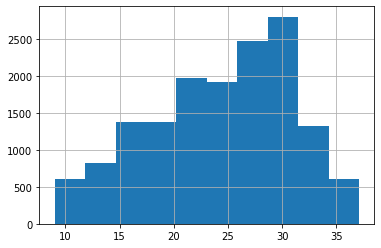

In [9]:
df_datos_procesados['TEMPERATURA MAXIMA'].hist(bins=10)

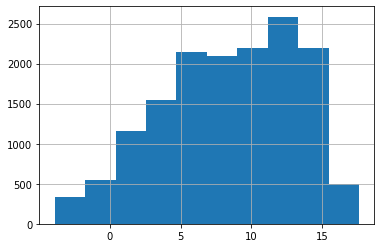

In [10]:
df_datos_procesados['TEMPERATURA MINIMA'].hist(bins=10)

Generamos los datos de estacionalidad. Para ello incluimos las vacaciones del 18 de septiembre. Normalizamos los valores de tempratura maxima y minima, generando nuevas columnas

In [11]:
df_datos_procesados['T_MAX_NORM'] = (df_datos_procesados['TEMPERATURA MAXIMA']- df_datos_procesados['TEMPERATURA MAXIMA'].min())/(df_datos_procesados['TEMPERATURA MAXIMA'].max() - df_datos_procesados['TEMPERATURA MAXIMA'].min())
df_datos_procesados['T_MIN_NORM'] = (df_datos_procesados['TEMPERATURA MINIMA']- df_datos_procesados['TEMPERATURA MINIMA'].min())/(df_datos_procesados['TEMPERATURA MINIMA'].max() - df_datos_procesados['TEMPERATURA MINIMA'].min())

In [12]:
df_datos_procesados

,Unnamed: 0,FECHA,DEPOSITO,NOMBRE_SKU,CATEGORIA,VOLUMEN_DEMANDADO,VOLUMEN_FACTURADO,CERCANIA_FERIADOS,ESTACION,TEMPORADA,TEMPERATURA MAXIMA,TEMPERATURA MINIMA,T_MAX_NORM,T_MIN_NORM
0,0,2017-02-06,2,G5,GASEOSAS,16.670,16.670,84,VERANO,VERANO,32.2,14.4,0.825623,0.851163
1,1,2017-02-13,2,G5,GASEOSAS,15.673,15.673,77,VERANO,VERANO,31.5,13.9,0.800712,0.827907
2,2,2017-02-20,2,G5,GASEOSAS,16.386,16.386,70,VERANO,VERANO,34.5,15.3,0.907473,0.893023
3,3,2017-02-27,2,G5,GASEOSAS,11.684,11.684,63,VERANO,VERANO,30.7,17.5,0.772242,0.995349
4,4,2017-03-06,2,G5,GASEOSAS,8.406,8.406,56,OTOÑO,TRABAJO,32.7,12.2,0.843416,0.748837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15280,15280,2022-03-28,4,G4,GASEOSAS,5.980,5.865,34,OTOÑO,TRABAJO,28.0,9.3,0.676157,0.613953
15281,15281,2022-04-04,4,G4,GASEOSAS,6.440,3.335,27,OTOÑO,TRABAJO,28.7,7.8,0.701068,0.544186
15282,15282,2022-04-11,4,G4,GASEOSAS,6.555,6.555,20,OTOÑO,TRABAJO,22.7,6.8,0.487544,0.497674
15283,15283,2022-04-18,4,G4,GASEOSAS,8.625,8.625,13,OTOÑO,TRABAJO,23.5,5.1,0.516014,0.418605


Comenzamos a generar una funcion que entrena a prophet para diferentes horizontes de eventos. Considerando 3 meses hacia atrás.

In [104]:
def procesar_df(df_in,categoria,col_categoria):
  #df_entrada: dataframe original de datos con temperaturas normalizadas
  #categoria: lista de categorias de interes sobre la cual agrupar
  #col_categoria: columna donde encontrar la categoria de interes sobre la cual agrupar
  df_entrada = df_in.copy()
  #df_test = df_entrada[['FECHA','VOLUMEN_DEMANDADO','T_MAX_NORM','T_MIN_NORM']].loc[(df_entrada[col_categoria].isin(categoria))]
  #dic_funciones = {'VOLUMEN_DEMANDADO':'sum',
  #                 'T_MAX_NORM':'first',
  #                 'T_MIN_NORM':'first'}
  df_test = df_entrada[['FECHA','VOLUMEN_DEMANDADO','VOLUMEN_FACTURADO']].loc[(df_entrada[col_categoria].isin(categoria))]
  dic_funciones = {'VOLUMEN_DEMANDADO':'sum',
                   'VOLUMEN_FACTURADO':'sum'}
  df_test_new = df_test.groupby(['FECHA'],as_index=False).agg(dic_funciones)
  return df_test_new

In [14]:
def modificar_df(df_in, horizonte_eval):
  'funcion que recibe un dataframe de entrada, un horizonte de evaluacion y lo modifica a formato adecuado para el prophet'
  'horizonte_eval: 5 para 30 dias, 15 para 90 dias, 53 para 365 dias '
  df_salida = df_in.copy()
  df_salida.rename(columns={'FECHA':'ds', 'VOLUMEN_DEMANDADO':'y'}, inplace = True)
  df_salida_train = df_salida[:-1*horizonte_eval]
  df_salida_test = df_salida.tail(horizonte_eval)
  return df_salida_train, df_salida_test

In [15]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE
def metricas(df_true,df_pred):
  #df_pred_filtrado = df_pred[df_pred.ds.isin(df_true['FECHA'].tolist())]
  rmse = MSE(df_true['y'],df_pred['yhat'], squared=False)
  mape = MAPE(df_true['y'],df_pred['yhat'])
  return rmse,mape

In [16]:
def ejec_prophet(df,periodos,categoria,col_categoria):
  # generamos dataset
  df_generado = procesar_df(df,categoria,col_categoria)
  # dividimos en entrenamiento y evaluacion
  df_train,df_test = modificar_df(df_generado,periodos)
  #iniciamos el modelo
  m = Prophet()
  #agregamos los regresores
  #m.add_regressor('T_MAX_NORM')
  #m.add_regressor('T_MIN_NORM')
  # ajustamos el modelo con datos de entrenamiento
  m.fit(df_train)
  # creamos un array de fechas a futuro
  future = m.make_future_dataframe(periods=7*periodos)
  # agregamos las temperaturas en las fechas a futuro
  #future['T_MAX_NORM'] = df_test['T_MAX_NORM'].tolist()
  #future['T_MIN_NORM'] = df_test['T_MIN_NORM'].tolist()
  # predecimos y escribimos el dataframe de salida de testeo
  forecast = m.predict(future)
  #forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7*periodos)
  # obtenemos el forecast que incluya unicamente las fechas de testeo
  forecast_2 = forecast[forecast.ds.isin(df_test['ds'].tolist())]
  # calculamos las metricas
  rmse, mape = metricas(df_test,forecast_2)
  # creamos un dataframe para los resultados
  resultados = {'Horizonte evaluacion':[str(periodos*6)+' dias'],
              'RMSE':[rmse],
              'MAPE':[mape]}
  df_resultados_testing = pd.DataFrame(data=resultados)
  return df_resultados_testing, forecast, df_generado

In [84]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.dates as mdates

def run_modelo(df,lista_interes,columna):
  # calculamos modelo
  df_30, pred_30, df_generado = ejec_prophet(df,5,lista_interes,columna)
  df_90, pred_90, _ = ejec_prophet(df_datos_procesados,15,lista_interes,columna)
  df_365, pred_365, _ = ejec_prophet(df_datos_procesados,53,lista_interes,columna)
  # Concatenamos las predicciones
  df_final_resultado = pd.concat([df_30, df_90, df_365], axis = 0)
  print(df_final_resultado)
  # visualizamos el forecasting
  fig, ax = plt.subplots(figsize=(30,10))

  half_year_locator = mdates.MonthLocator(interval=2)
  year_month_formatter = mdates.DateFormatter("%Y-%m")

  ax.xaxis.set_major_locator(half_year_locator)
  ax.xaxis.set_major_formatter(year_month_formatter)

  plt.xlabel('Fecha')
  plt.ylabel('VOLUMEN_DEMANDADO')
  plt.plot(df_generado['FECHA'].astype('datetime64[ns]'),df_generado['VOLUMEN_DEMANDADO'], label='original')
  plt.plot(pred_30['ds'],pred_30['yhat'], label='prediccion 30 dias')
  plt.plot(pred_90['ds'],pred_90['yhat'], label='prediccion 90 dias')
  plt.plot(pred_365['ds'],pred_365['yhat'], label='prediccion 365 dias')

  fig.autofmt_xdate()

  ax.legend(loc="upper left")
  plt.show()
  return pred_30,pred_90,pred_365

Creamos el siguiente esquema de evaluacion y reportaje de rendimiento

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/a72z2xfp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/lxqp6u9d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48651', 'data', 'file=/tmp/tmpi1jow4kx/a72z2xfp.json', 'init=/tmp/tmpi1jow4kx/lxqp6u9d.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_modelq2zvmv_o/prophet_model-20221202210118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:01:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:01:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion         RMSE      MAPE
0              30 dias  4005.205075  0.470275
0              90 dias  3343.345646  0.301798
0             318 dias  5290.646806  0.457334


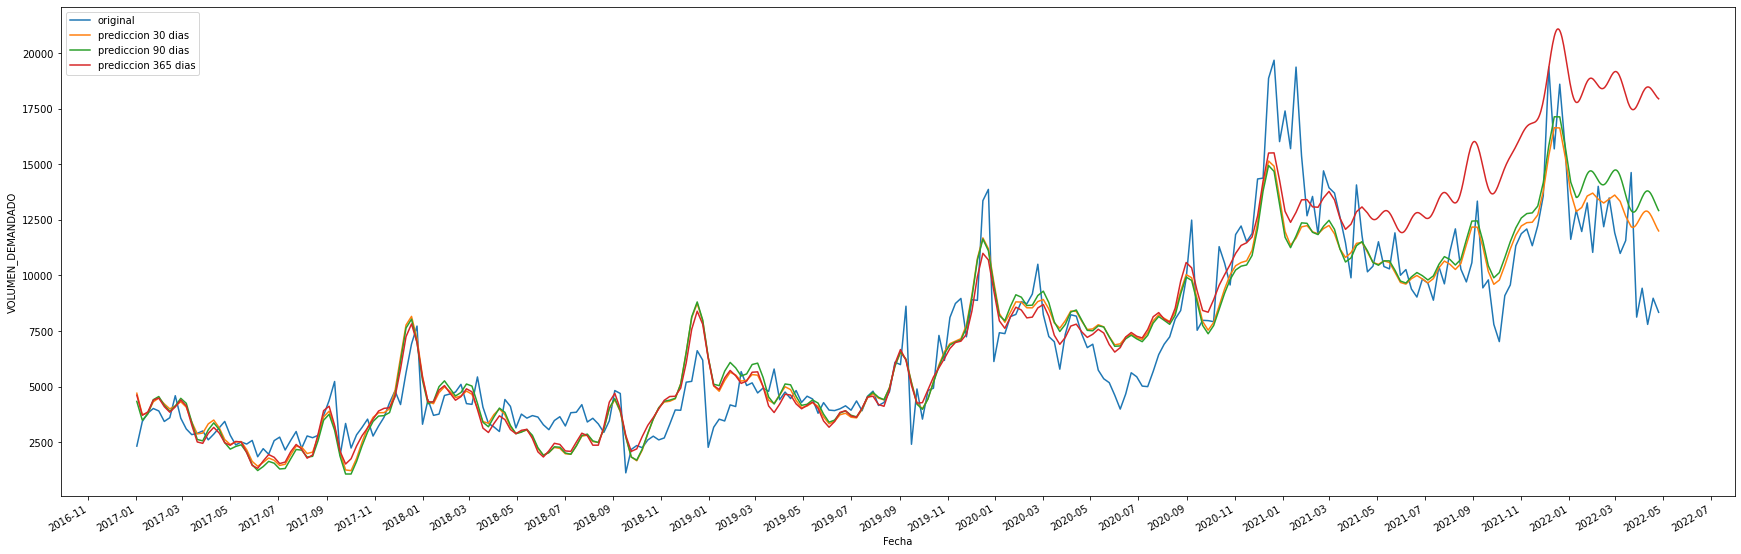

In [85]:
pred_30,pred_90,pred_365 = run_modelo(df_datos_procesados,['GASEOSAS','MASIVAS','PREMIUM'],'CATEGORIA')

In [142]:
def diferencia_demanda_factura(df_pred,df_test,periodo):
  pred = df_pred[df_pred.ds.isin(df_test['FECHA'].tolist())]
  col_1 = pred['yhat'].tail(periodo).reset_index()
  col_2 = df_test['VOLUMEN_FACTURADO'].tail(periodo).reset_index()
  dif = col_1['yhat'].subtract(col_2['VOLUMEN_FACTURADO'],axis=0)
  return dif.sum()

In [143]:
df_test_30 = procesar_df(df_datos_procesados,['GASEOSAS','MASIVAS','PREMIUM'],'CATEGORIA')
dif_total = diferencia_demanda_factura(pred_30,df_test_30,5)
print('Diferencia volumen: ',dif_total)

Diferencia volumen:  22457.935180608212


In [144]:
df_test_90 = procesar_df(df_datos_procesados,['GASEOSAS','MASIVAS','PREMIUM'],'CATEGORIA')
dif_total = diferencia_demanda_factura(pred_90,df_test_90,15)
print('Diferencia volumen: ',dif_total)

Diferencia volumen:  63272.80415902643


In [145]:
df_test_365 = procesar_df(df_datos_procesados,['GASEOSAS','MASIVAS','PREMIUM'],'CATEGORIA')
dif_total = diferencia_demanda_factura(pred_365,df_test_365,53)
print('Diferencia volumen: ',dif_total)

Diferencia volumen:  302149.1356670945


In [93]:
dif_total = diferencia_demanda_factura(pred_90,df_datos_procesados,15)
print('Diferencia volumen: ',dif_total)

Diferencia volumen:  0.0


# Gaseosa

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/4irlk2c3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/xvlgqky1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15994', 'data', 'file=/tmp/tmpi1jow4kx/4irlk2c3.json', 'init=/tmp/tmpi1jow4kx/xvlgqky1.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_modelyxua1_4k/prophet_model-20221202193950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:39:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:39:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion         RMSE      MAPE
0              30 dias  1600.536888  0.292675
0              90 dias  1119.887668  0.139276
0             318 dias  1017.403068  0.123934


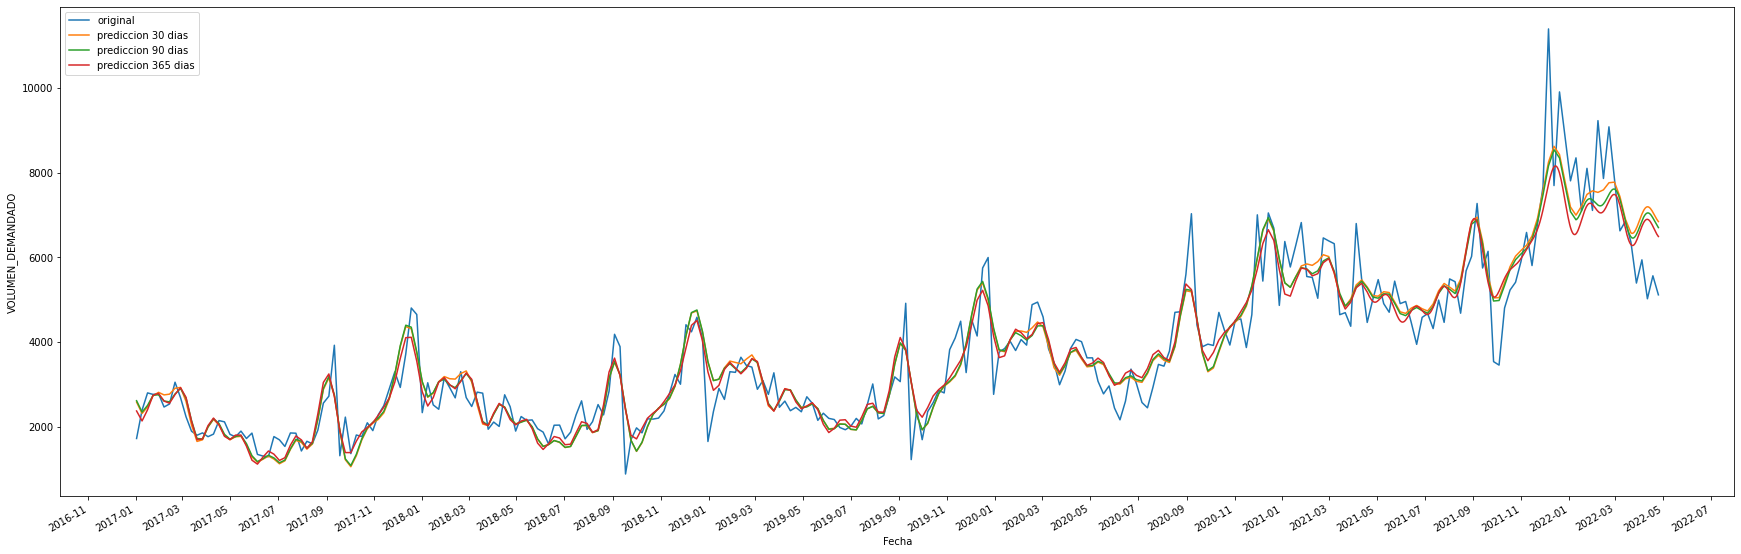

In [38]:
run_modelo(df_datos_procesados,['GASEOSAS'],'CATEGORIA')

# Cerveza

## Cerveza en conjunto

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/e__cdqbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/v7v7aiyj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48068', 'data', 'file=/tmp/tmpi1jow4kx/e__cdqbg.json', 'init=/tmp/tmpi1jow4kx/v7v7aiyj.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_model51h016d8/prophet_model-20221202193954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:39:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:39:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion         RMSE      MAPE
0              30 dias  2264.067141  0.731107
0              90 dias  2472.605253  0.628291
0             318 dias  5025.148296  1.037177


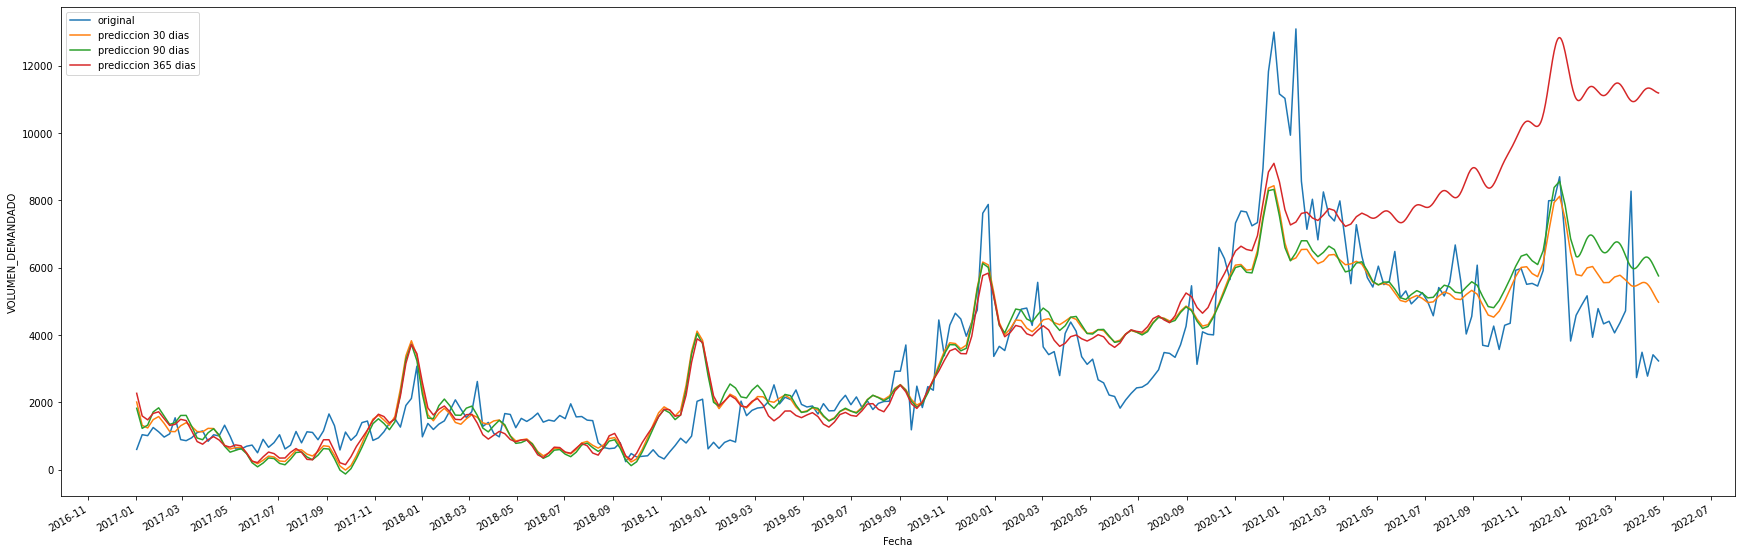

In [39]:
run_modelo(df_datos_procesados,['MASIVAS','PREMIUM'],'CATEGORIA')

##Cerveza por tipo (MASIVA vs PREMIUM)

Masiva

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/mzzg2fds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/fx9iu_y0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20928', 'data', 'file=/tmp/tmpi1jow4kx/mzzg2fds.json', 'init=/tmp/tmpi1jow4kx/fx9iu_y0.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_modelasfzo1qn/prophet_model-20221202194050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:40:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:40:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion         RMSE      MAPE
0              30 dias   526.331394  0.349091
0              90 dias  1250.883270  0.854973
0             318 dias  2346.449162  1.321985


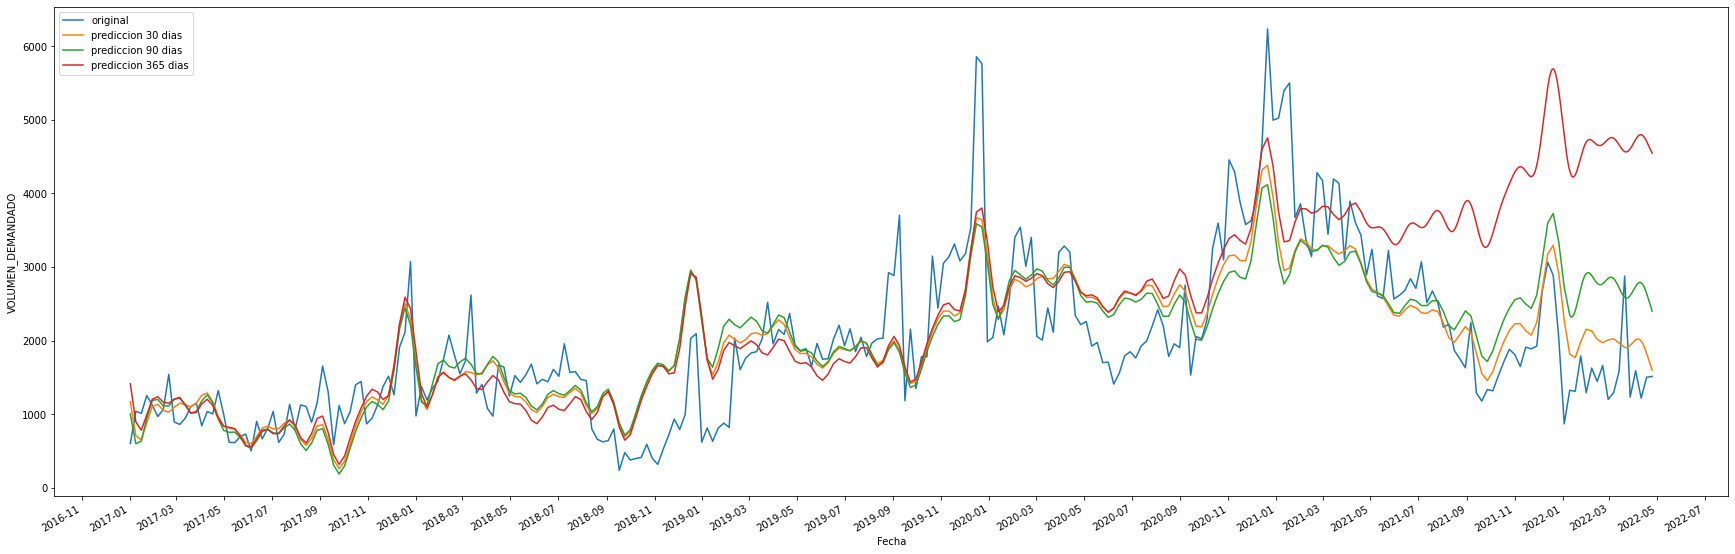

In [40]:
run_modelo(df_datos_procesados,['MASIVAS'],'CATEGORIA')

Premium

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/60f5ge7p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/ch4_lumb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45733', 'data', 'file=/tmp/tmpi1jow4kx/60f5ge7p.json', 'init=/tmp/tmpi1jow4kx/ch4_lumb.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_model0epg4ley/prophet_model-20221202194119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:41:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion         RMSE      MAPE
0              30 dias  1918.024664  1.132174
0              90 dias  1899.176532  0.812092
0             318 dias  2596.594757  0.901228


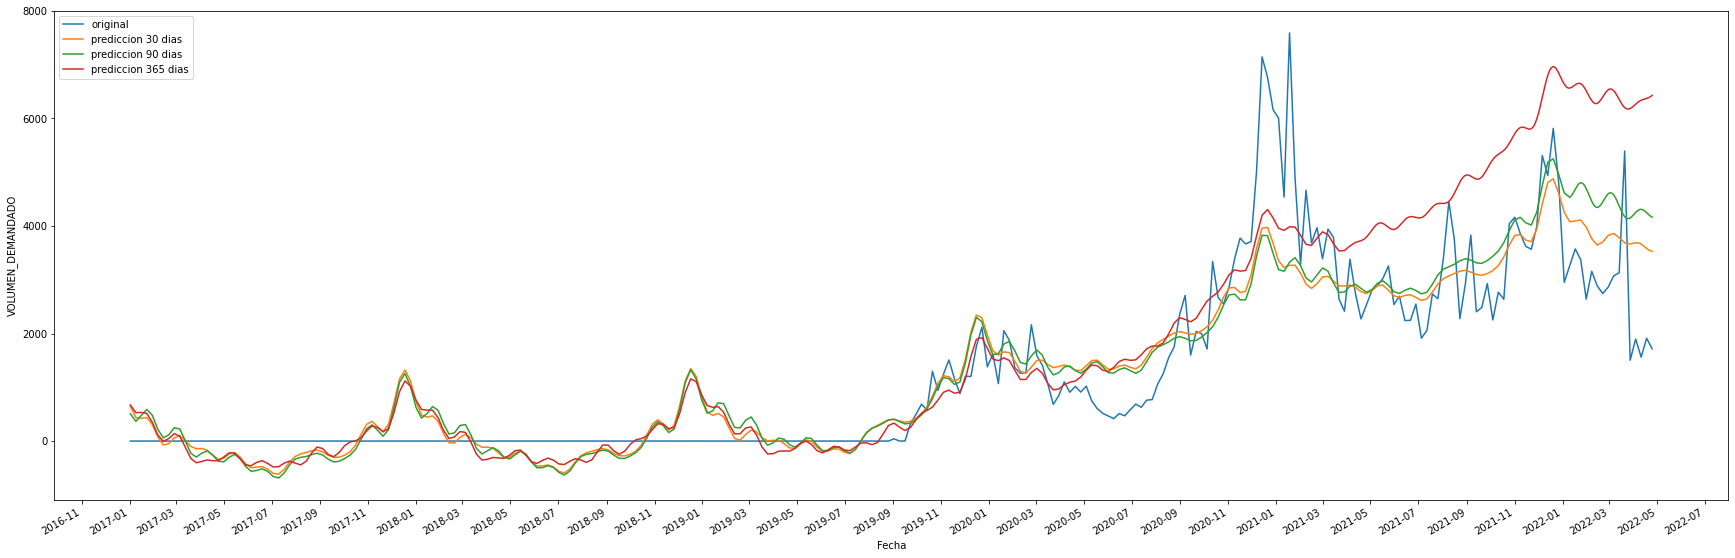

In [41]:
run_modelo(df_datos_procesados,['PREMIUM'],'CATEGORIA')

# SKU unicos: 
C1-C6

G1-G5

##C1

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/yuks_xk0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/dii9lctg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54937', 'data', 'file=/tmp/tmpi1jow4kx/yuks_xk0.json', 'init=/tmp/tmpi1jow4kx/dii9lctg.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_modelqywwlm50/prophet_model-20221202200600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion         RMSE      MAPE
0              30 dias   760.599759  0.747822
0              90 dias  1046.042790  0.825887
0             318 dias  2411.397444  1.560909


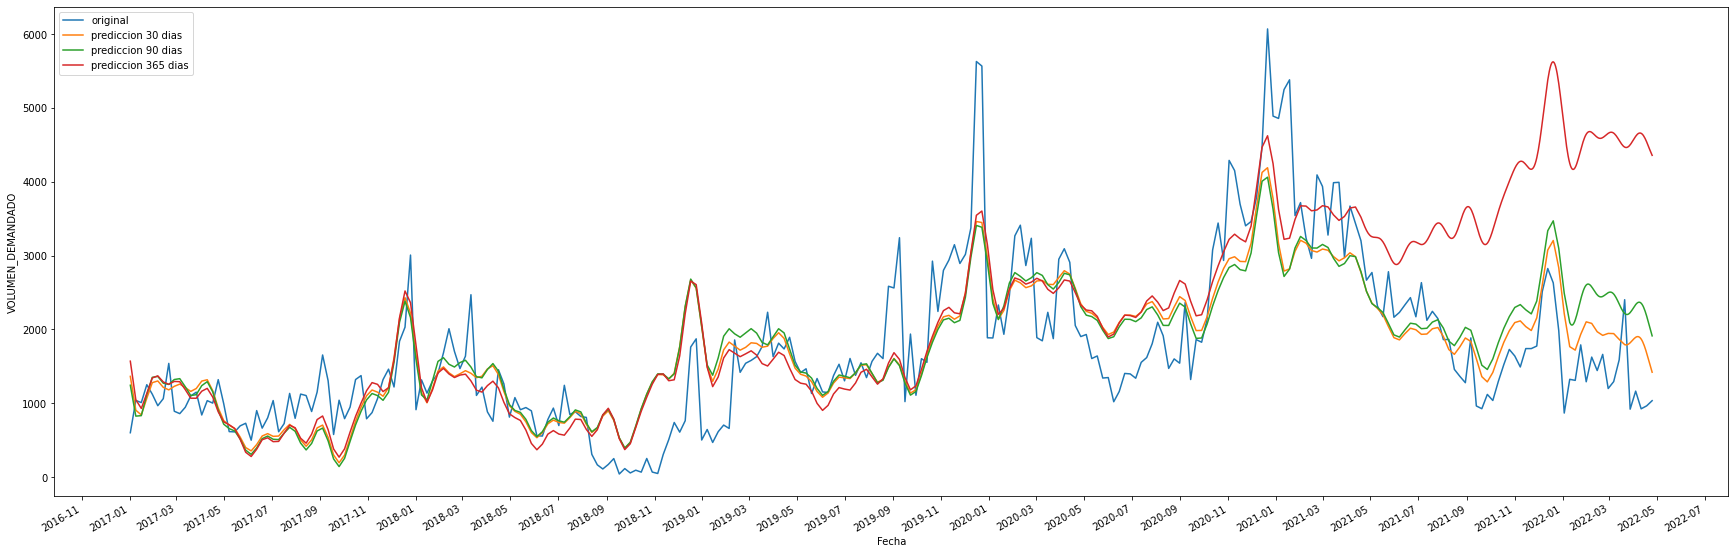

In [42]:
run_modelo(df_datos_procesados,['C1'],'NOMBRE_SKU')

##C3

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/yomozhwc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/ppo74lag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94356', 'data', 'file=/tmp/tmpi1jow4kx/yomozhwc.json', 'init=/tmp/tmpi1jow4kx/ppo74lag.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_model1lqp3c_2/prophet_model-20221202200604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion         RMSE      MAPE
0              30 dias  1542.883860  1.000649
0              90 dias  1788.119130  0.883404
0             318 dias  2587.890447  1.032870


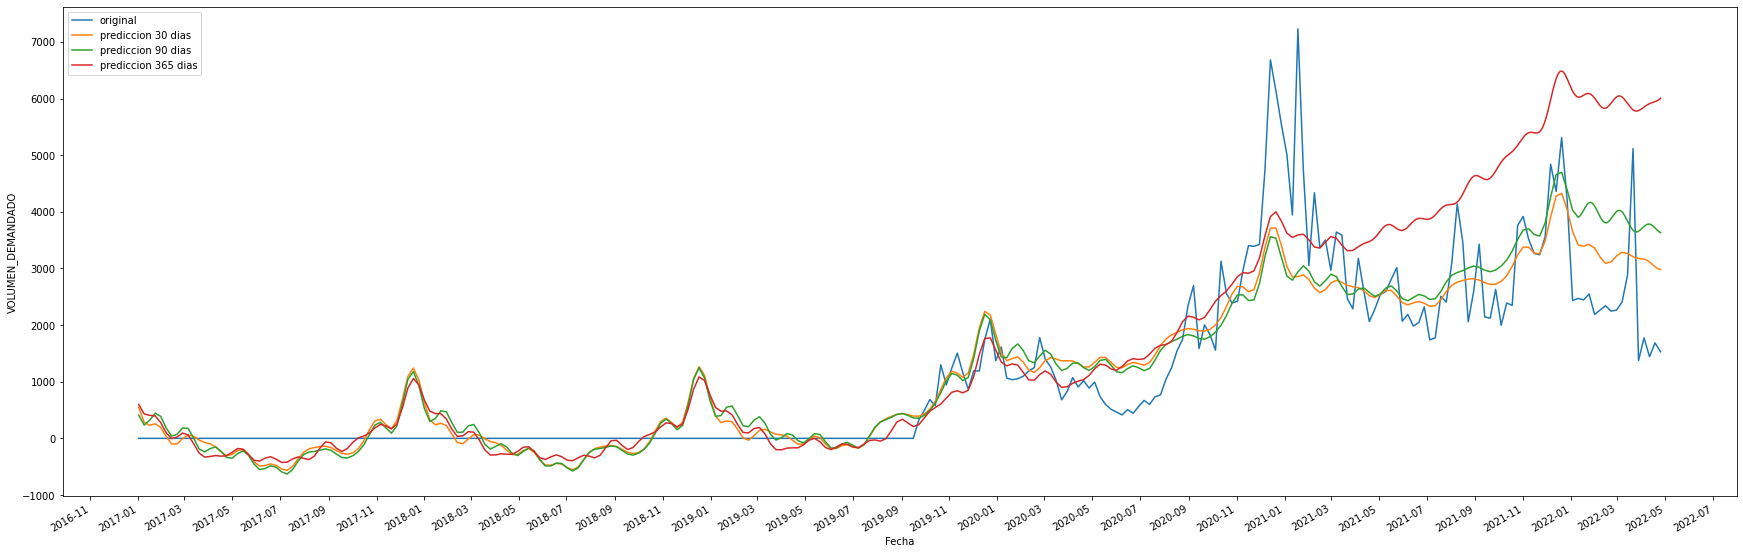

In [43]:
run_modelo(df_datos_procesados,['C3'],'NOMBRE_SKU')

##C4

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/nat1md2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/d_dn1asc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99651', 'data', 'file=/tmp/tmpi1jow4kx/nat1md2k.json', 'init=/tmp/tmpi1jow4kx/d_dn1asc.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_model4ylurkm7/prophet_model-20221202200608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion        RMSE          MAPE
0              30 dias  229.781626  5.111291e-01
0              90 dias  180.332101  3.363215e+17
0             318 dias  129.828704  7.463108e+16


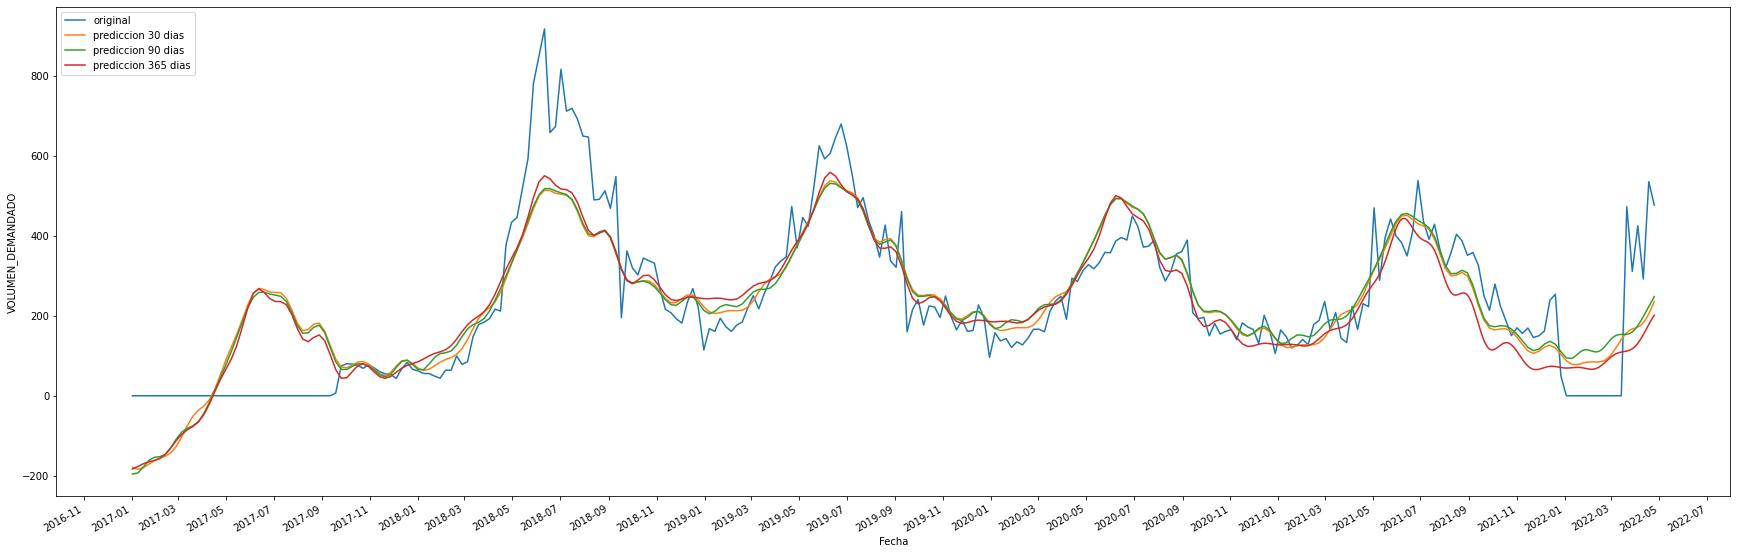

In [44]:
run_modelo(df_datos_procesados,['C4'],'NOMBRE_SKU')

## C5

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/aqtrbve1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/y5qjlwkw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23748', 'data', 'file=/tmp/tmpi1jow4kx/aqtrbve1.json', 'init=/tmp/tmpi1jow4kx/y5qjlwkw.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_model4iri_z68/prophet_model-20221202200613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion        RMSE      MAPE
0              30 dias  136.343588  1.348593
0              90 dias  108.326991  0.755721
0             318 dias   82.012429  0.448510


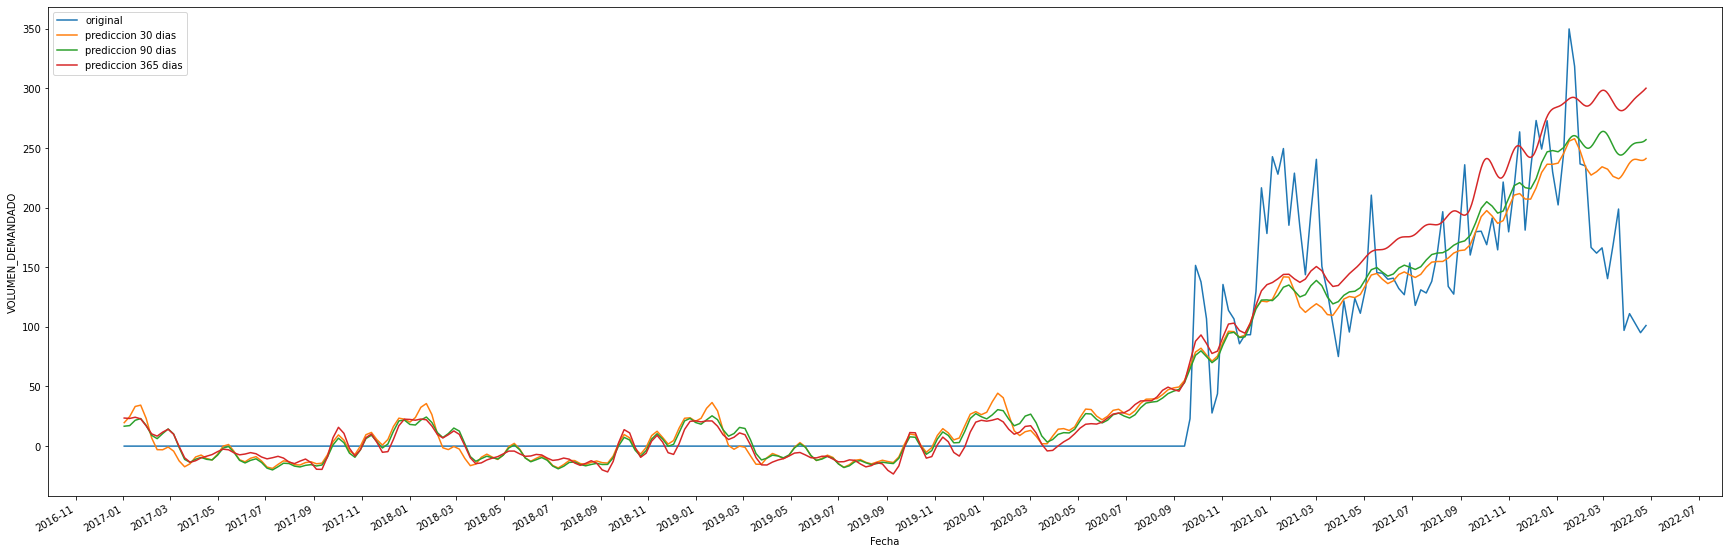

In [45]:
run_modelo(df_datos_procesados,['C5'],'NOMBRE_SKU')

## C6

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/es8y94mb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/zce0ojce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46546', 'data', 'file=/tmp/tmpi1jow4kx/es8y94mb.json', 'init=/tmp/tmpi1jow4kx/zce0ojce.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_modelfk7751ud/prophet_model-20221202200618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion        RMSE      MAPE
0              30 dias  154.965868  7.088034
0              90 dias  217.295420  2.381693
0             318 dias  139.615165  0.935161


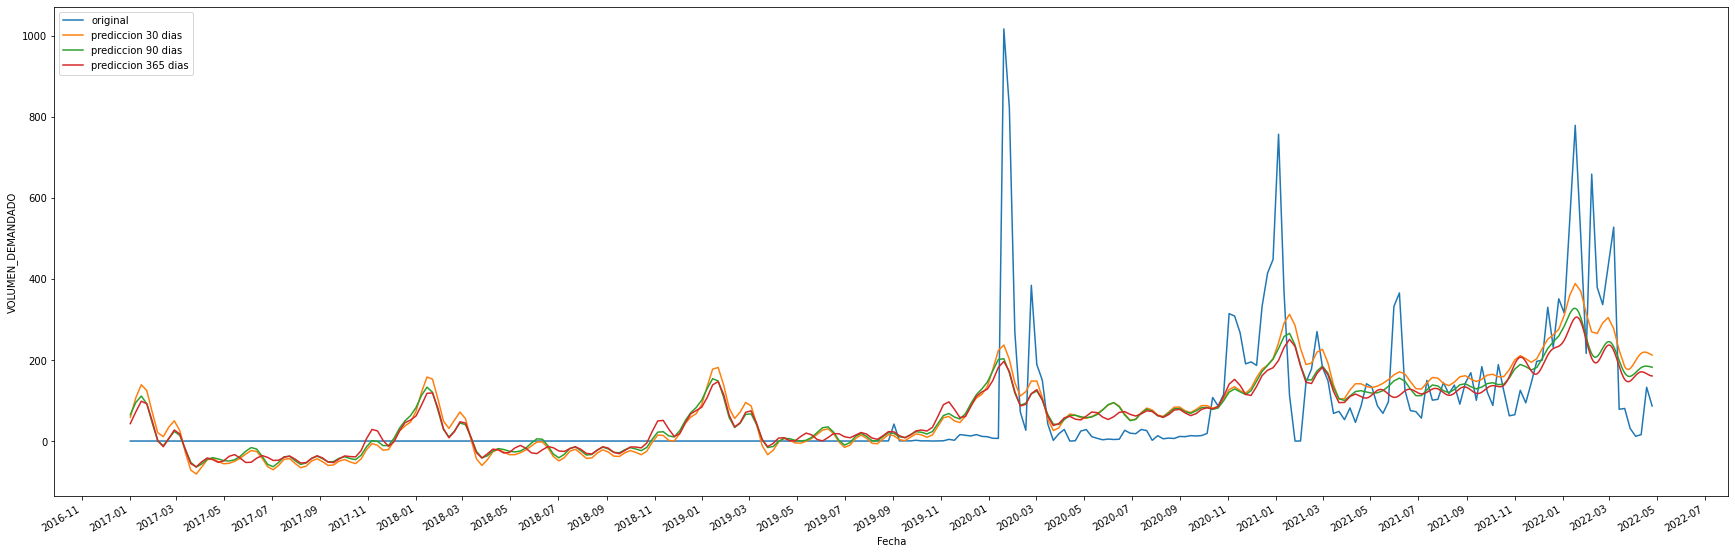

In [46]:
run_modelo(df_datos_procesados,['C6'],'NOMBRE_SKU')

## G1

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/66hn9f40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/jmhqxwy8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78599', 'data', 'file=/tmp/tmpi1jow4kx/66hn9f40.json', 'init=/tmp/tmpi1jow4kx/jmhqxwy8.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_modelqphdtgbv/prophet_model-20221202200626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion         RMSE      MAPE
0              30 dias  1008.530277  0.498292
0              90 dias   735.853016  0.242302
0             318 dias   572.872987  0.167162


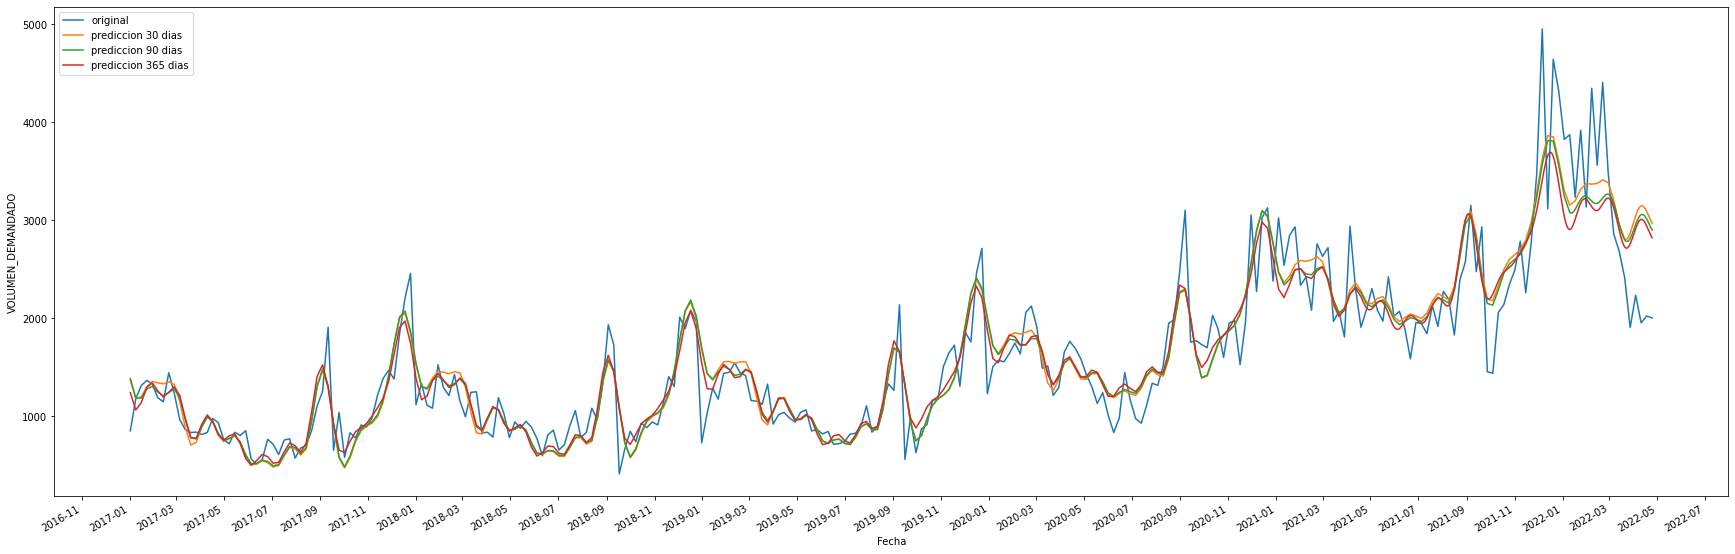

In [47]:
run_modelo(df_datos_procesados,['G1'],'NOMBRE_SKU')

##G2

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/lu_m3rhc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/8tih3i9u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33077', 'data', 'file=/tmp/tmpi1jow4kx/lu_m3rhc.json', 'init=/tmp/tmpi1jow4kx/8tih3i9u.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_modelwpa45j89/prophet_model-20221202200631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion        RMSE      MAPE
0              30 dias  582.255652  0.197936
0              90 dias  449.978226  0.112931
0             318 dias  451.291145  0.129660


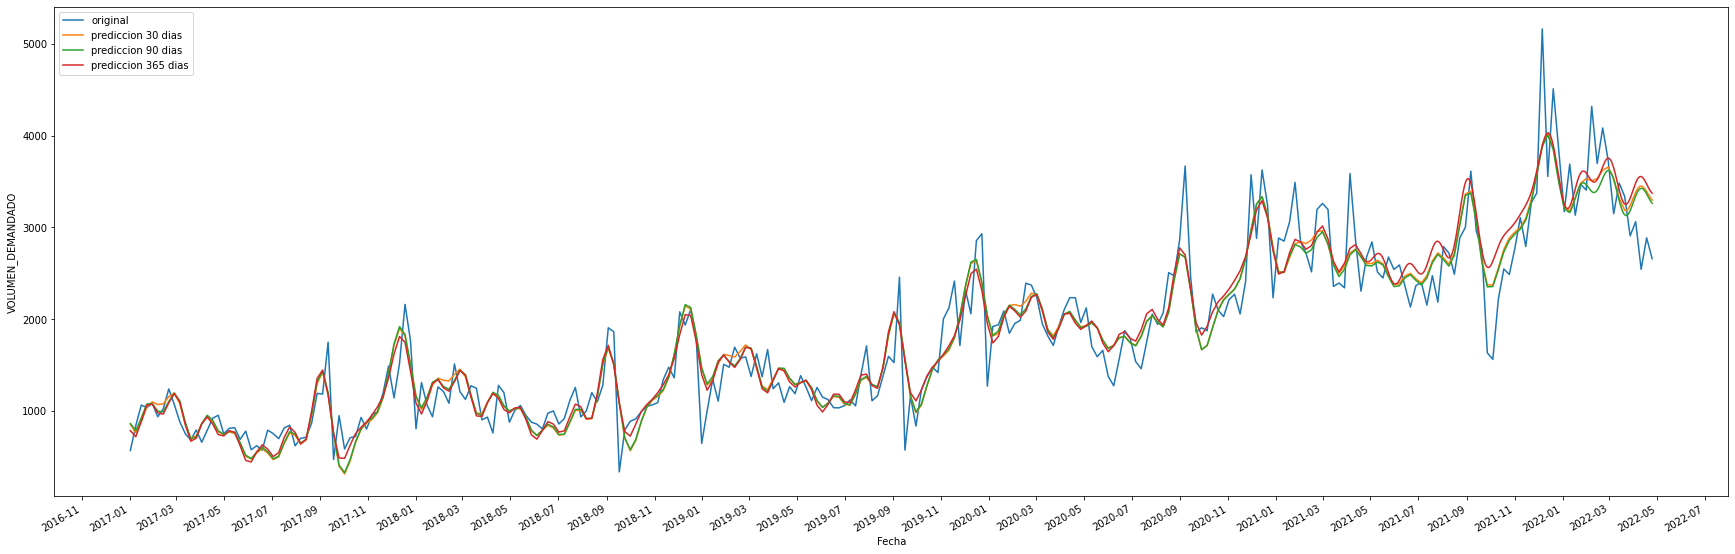

In [48]:
run_modelo(df_datos_procesados,['G2'],'NOMBRE_SKU')

##G3

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/93lpn3dv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/_6p4ibqn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80344', 'data', 'file=/tmp/tmpi1jow4kx/93lpn3dv.json', 'init=/tmp/tmpi1jow4kx/_6p4ibqn.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_modeln4rac0a7/prophet_model-20221202200634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion        RMSE      MAPE
0              30 dias  104.483709  0.224950
0              90 dias  119.387285  0.233346
0             318 dias  289.962439  0.554045


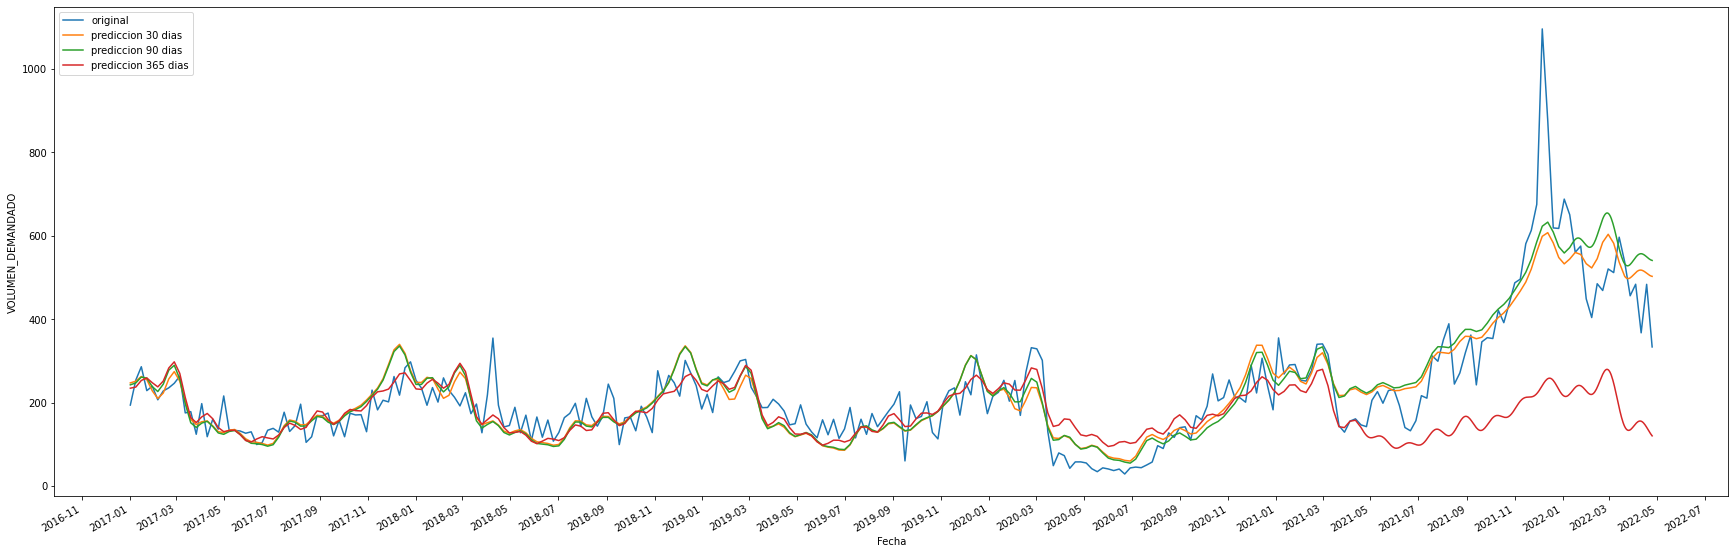

In [49]:
run_modelo(df_datos_procesados,['G3'],'NOMBRE_SKU')

## G4

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/ad8sjvye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/r5yxwcj1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24673', 'data', 'file=/tmp/tmpi1jow4kx/ad8sjvye.json', 'init=/tmp/tmpi1jow4kx/r5yxwcj1.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_modelz4caap47/prophet_model-20221202200637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion       RMSE          MAPE
0              30 dias   5.924697  6.597819e-02
0              90 dias  40.846343  1.117145e+00
0             318 dias  73.392158  9.305128e+15


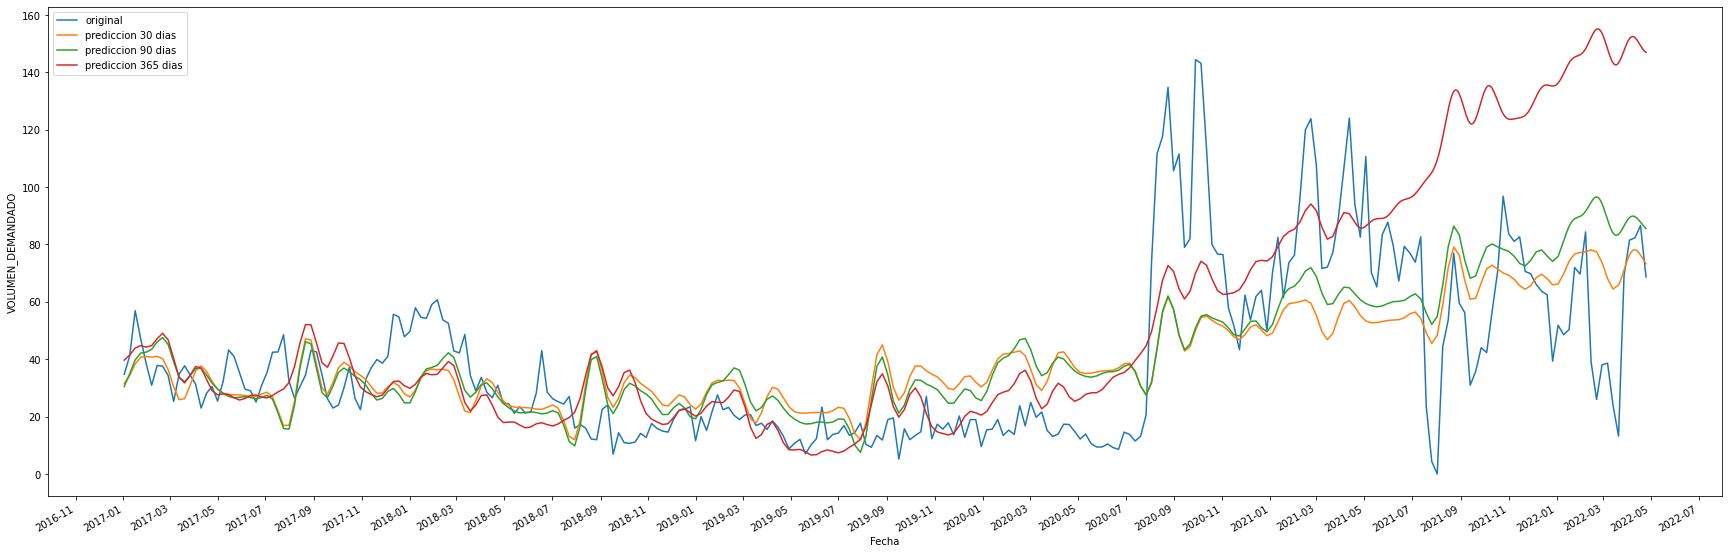

In [50]:
run_modelo(df_datos_procesados,['G4'],'NOMBRE_SKU')

##G5

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/p3t3y4pq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1jow4kx/jc96bhn7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38543', 'data', 'file=/tmp/tmpi1jow4kx/p3t3y4pq.json', 'init=/tmp/tmpi1jow4kx/jc96bhn7.json', 'output', 'file=/tmp/tmpi1jow4kx/prophet_modelhjvftky3/prophet_model-20221202200640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:06:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality

  Horizonte evaluacion       RMSE      MAPE
0              30 dias  28.278786  0.335115
0              90 dias  28.102450  0.313099
0             318 dias  91.000511  1.691237


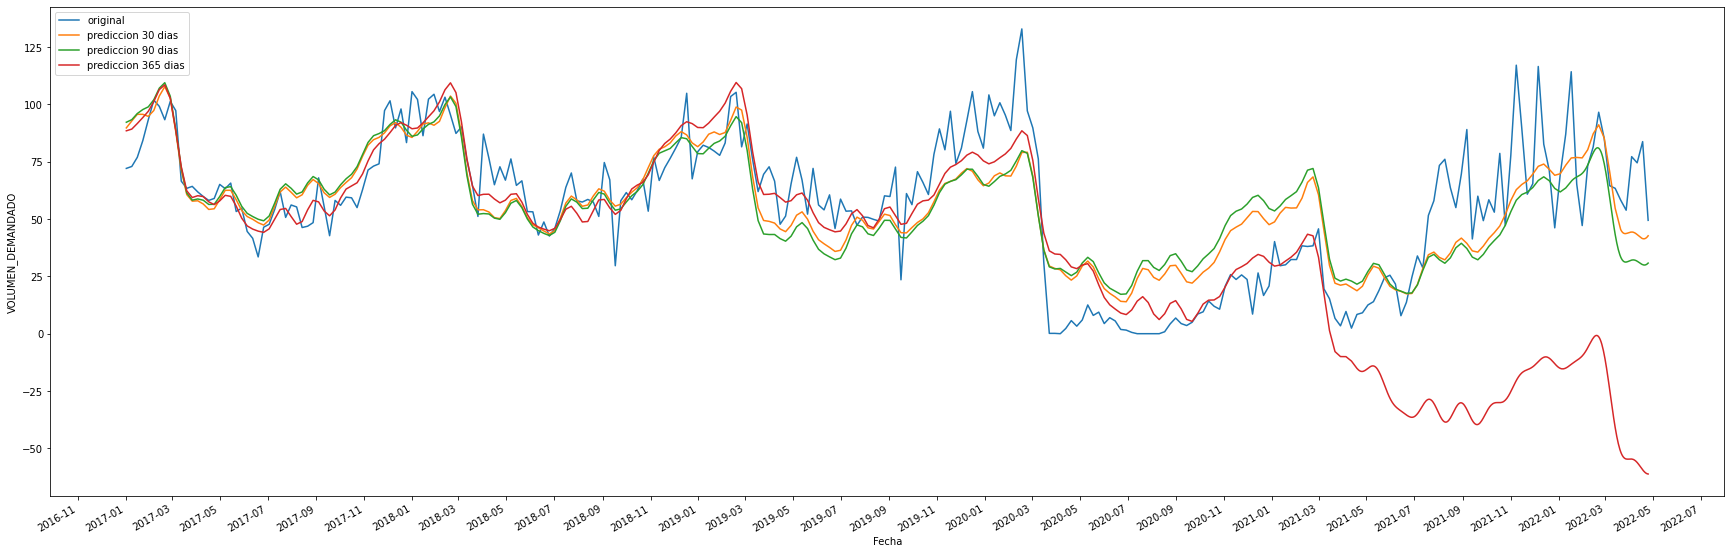

In [51]:
run_modelo(df_datos_procesados,['G5'],'NOMBRE_SKU')

# ARIMA

In [52]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.0 MB/s 
     |████████████████████████████████| 9.9 MB 34.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [74]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

y = procesar_df(df_datos_procesados,['GASEOSAS','MASIVAS','PREMIUM'],'CATEGORIA')
train, test = train_test_split(y['VOLUMEN_DEMANDADO'], train_size=(len(y)-5))

test

273    8123.576
274    9423.992
275    7795.844
276    8973.509
277    8340.029
Name: VOLUMEN_DEMANDADO, dtype: float64

In [75]:

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=3)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

In [76]:
forecasts

273    13645.678815
274    13578.723126
275    13223.994324
276    13337.915975
277    13345.673040
dtype: float64

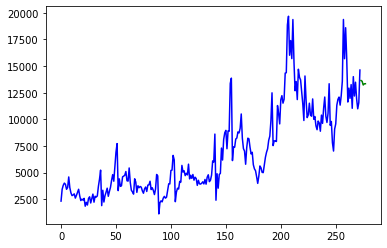

In [77]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:(len(y)-5)], train, c='blue')
plt.plot(x[(len(y)-5):], forecasts, c='green')
plt.show()

In [78]:
rmse_30 = MSE(test,forecasts, squared=False)
mape_30 = MAPE(test,forecasts)
print('RMSE: ',rmse_30)
print('MAPE: ',mape_30)

RMSE:  4925.9465419683165
MAPE:  0.5806956864595305


In [79]:
def experimentos_ARIMA(df,periodos,seasons):
  # datos de evaluacion
  y = procesar_df(df_datos_procesados,['GASEOSAS','MASIVAS','PREMIUM'],'CATEGORIA')
  train, test = train_test_split(y['VOLUMEN_DEMANDADO'], train_size=(len(y)-periodos))
  # Fit your model
  model = pm.auto_arima(train, seasonal=True, m=seasons)

  # make your forecasts
  forecasts = model.predict(test.shape[0])  # predict N steps into the future
  # Visualize the forecasts (blue=train, green=forecasts)
  x = np.arange(y.shape[0])
  plt.plot(x[:(len(y)-periodos)], train, c='blue')
  plt.plot(x[(len(y)-periodos):], forecasts, c='green')
  plt.show()

  rmse = MSE(test,forecasts, squared=False)
  mape = MAPE(test,forecasts)
  resultados = {'Horizonte evaluacion':[str(periodos*6)+' dias'],
              'RMSE':[rmse],
              'MAPE':[mape]}
  df_metricas = pd.DataFrame(data=resultados)
  return df_metricas

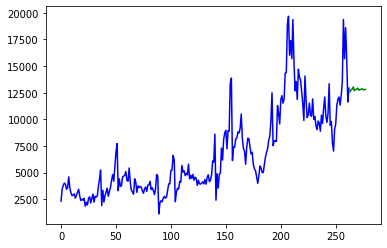

,Horizonte evaluacion,RMSE,MAPE
0,90 dias,2683.489633,0.228802


In [81]:
df_m_90 = experimentos_ARIMA(df_datos_procesados,15,4)
df_m_90

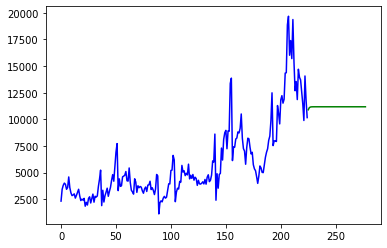

,Horizonte evaluacion,RMSE,MAPE
0,318 dias,2448.142933,0.163037


In [83]:
df_m_365 = experimentos_ARIMA(df_datos_procesados,53,4)
df_m_365